# Mounting Google Drive

In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Step 1: Load the CSV Data

In [49]:
import pandas as pd

# Load the CSV data into DataFrames
world_cups = pd.read_csv('/content/drive/MyDrive/Project 11_ FIFA World Cup Analysis/WorldCups.csv')
world_cup_matches = pd.read_csv('/content/drive/MyDrive/Project 11_ FIFA World Cup Analysis/WorldCupMatches.csv')

# Step 2: Data Exploration

In [50]:
# Display the first few rows of each DataFrame
print("World Cups:")
print(world_cups.head())

print("\nWorld Cup Matches:")
print(world_cup_matches.head())

# Check the data types and general info
print("\nWorld Cups Info:")
print(world_cups.info())

print("\nWorld Cup Matches Info:")
print(world_cup_matches.info())

# Check for missing values
print("\nMissing Values in World Cups:")
print(world_cups.isnull().sum())

print("\nMissing Values in World Cup Matches:")
print(world_cup_matches.isnull().sum())


World Cups:
   Year      Country      Winner      Runners-Up    Third      Fourth  \
0  1930      Uruguay     Uruguay       Argentina      USA  Yugoslavia   
1  1934        Italy       Italy  Czechoslovakia  Germany     Austria   
2  1938       France       Italy         Hungary   Brazil      Sweden   
3  1950       Brazil     Uruguay          Brazil   Sweden       Spain   
4  1954  Switzerland  Germany FR         Hungary  Austria     Uruguay   

   GoalsScored  QualifiedTeams  MatchesPlayed Attendance  
0           70              13             18    590.549  
1           70              16             17    363.000  
2           84              15             18    375.700  
3           88              13             22  1.045.246  
4          140              16             26    768.607  

World Cup Matches:
     Year              Datetime    Stage         Stadium         City  \
0  1930.0  13 Jul 1930 - 15:00   Group 1         Pocitos  Montevideo    
1  1930.0  13 Jul 1930 - 15:0


# Step 3: Key Metrics and Factors Analysis

Analysis of World Cups Dataset:

In [52]:
# Count of World Cups hosted by each country
host_count = world_cups['Country'].value_counts()

# Total matches played in each World Cup
matches_played = world_cups['MatchesPlayed']

# Check for non-numeric values in 'Attendance'
non_numeric_attendance = world_cups[~world_cups['Attendance'].str.replace('.', '', regex=False).str.isnumeric()]

# Replace non-numeric values with NaN and convert the column to numeric
world_cups['Attendance'] = pd.to_numeric(world_cups['Attendance'], errors='coerce')

# Average attendance per World Cup
average_attendance = world_cups['Attendance'].mean()

# Total goals scored in each World Cup
total_goals = world_cups['GoalsScored']

# Winner, Runners-Up, Third, Fourth
winners = world_cups['Winner']
runners_up = world_cups['Runners-Up']
third_place = world_cups['Third']
fourth_place = world_cups['Fourth']


Analysis of World Cup Matches Dataset:


In [53]:
# Average attendance per match
average_attendance_per_match = world_cup_matches['Attendance'].mean()

# Total goals scored in all matches
total_goals_scored = world_cup_matches['Home Team Goals'].sum() + world_cup_matches['Away Team Goals'].sum()

# Home team win rate
home_win_rate = (world_cup_matches['Home Team Goals'] > world_cup_matches['Away Team Goals']).mean()

# Away team win rate
away_win_rate = (world_cup_matches['Away Team Goals'] > world_cup_matches['Home Team Goals']).mean()

# Draw rate
draw_rate = (world_cup_matches['Home Team Goals'] == world_cup_matches['Away Team Goals']).mean()


# Step 4: Visualization and Interpretation

**Visualizations for World Cup Data**

1. Number of World Cups Hosted by Each Country (Bar Chart)

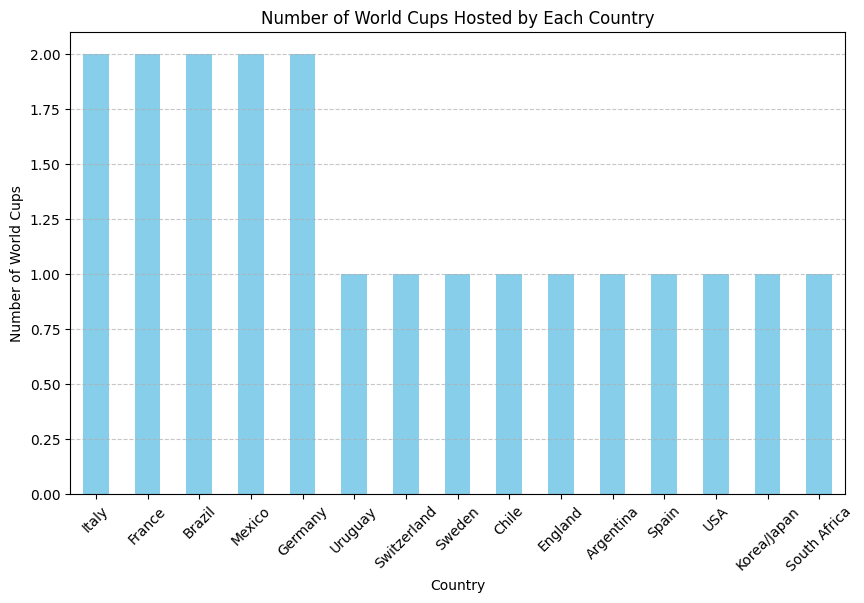

In [54]:
import matplotlib.pyplot as plt

# Grouping the data by country and counting the number of world cups
world_cup_counts = world_cups['Country'].value_counts()

# Creating a bar chart
plt.figure(figsize=(10, 6))
world_cup_counts.plot(kind='bar', color='skyblue')
plt.title('Number of World Cups Hosted by Each Country')
plt.xlabel('Country')
plt.ylabel('Number of World Cups')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


2. Average Attendance per World Cup (Line Chart)

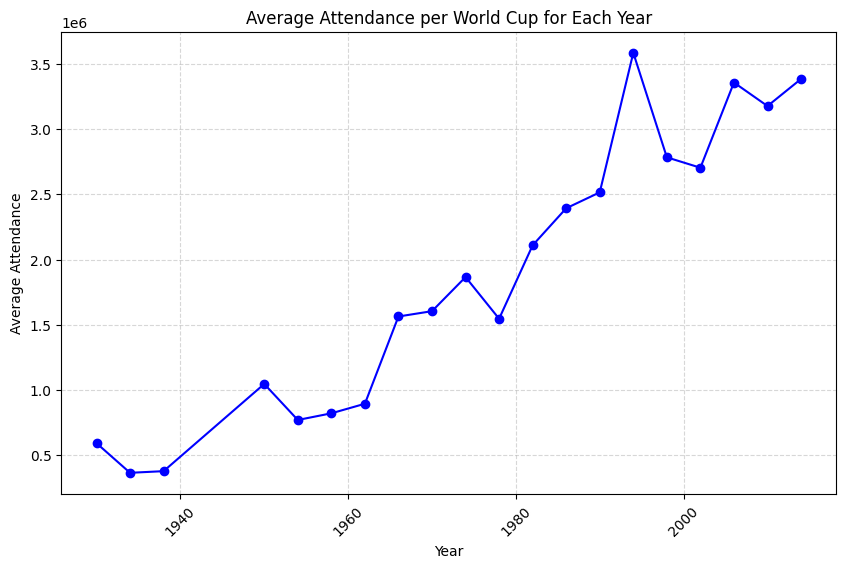

In [56]:
import matplotlib.pyplot as plt

# Plotting the average attendance per World Cup for each year
plt.figure(figsize=(10, 6))
plt.plot(average_attendance_per_year.index, average_attendance_per_year.values, marker='o', color='b')
plt.title('Average Attendance per World Cup for Each Year')
plt.xlabel('Year')
plt.ylabel('Average Attendance')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.show()


3. Top 5 Countries with the Most World Cup Wins (Horizontal Bar Chart)

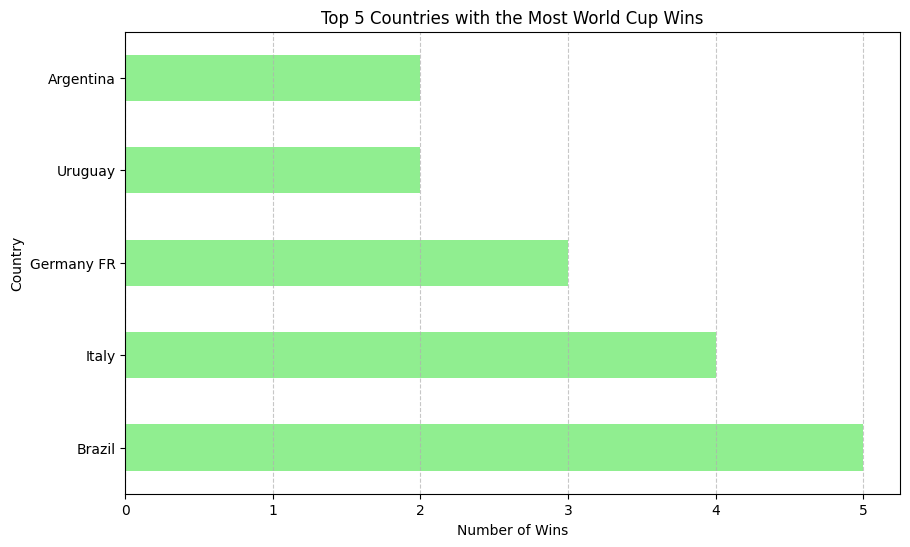

In [57]:
# Grouping the data by winner and counting the number of wins
top_countries = world_cups['Winner'].value_counts().head(5)

# Creating a horizontal bar chart
plt.figure(figsize=(10, 6))
top_countries.plot(kind='barh', color='lightgreen')
plt.title('Top 5 Countries with the Most World Cup Wins')
plt.xlabel('Number of Wins')
plt.ylabel('Country')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


**Visualizations for World Cup Matches Data**

1. Distribution of Home and Away Team Goals (Histogram)

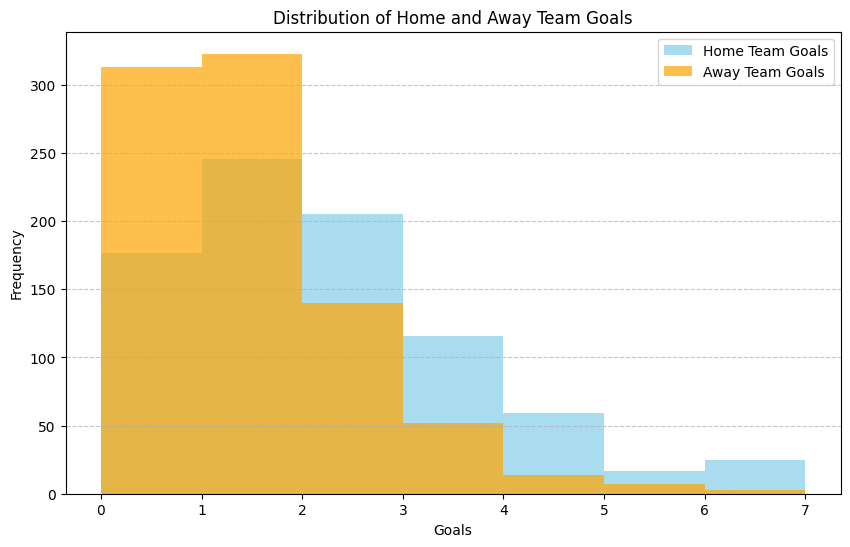

In [58]:
# Creating a histogram for home and away team goals
plt.figure(figsize=(10, 6))
plt.hist(world_cup_matches['Home Team Goals'], bins=range(8), alpha=0.7, label='Home Team Goals', color='skyblue')
plt.hist(world_cup_matches['Away Team Goals'], bins=range(8), alpha=0.7, label='Away Team Goals', color='orange')
plt.title('Distribution of Home and Away Team Goals')
plt.xlabel('Goals')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



2. Match Outcome Distribution (Pie Chart)

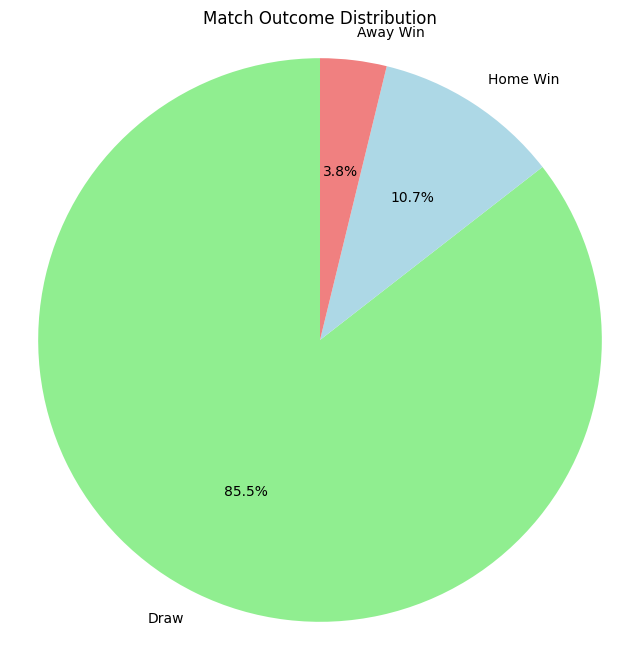

In [59]:
# Creating a pie chart for match outcomes
match_outcomes = world_cup_matches.apply(lambda row: 'Home Win' if row['Home Team Goals'] > row['Away Team Goals']
                                         else ('Away Win' if row['Home Team Goals'] < row['Away Team Goals'] else 'Draw'), axis=1)
match_outcome_counts = match_outcomes.value_counts()

plt.figure(figsize=(8, 8))
plt.pie(match_outcome_counts, labels=match_outcome_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'lightblue', 'lightcoral'])
plt.title('Match Outcome Distribution')
plt.axis('equal')
plt.show()


3. Average Attendance per Match (Line Chart)

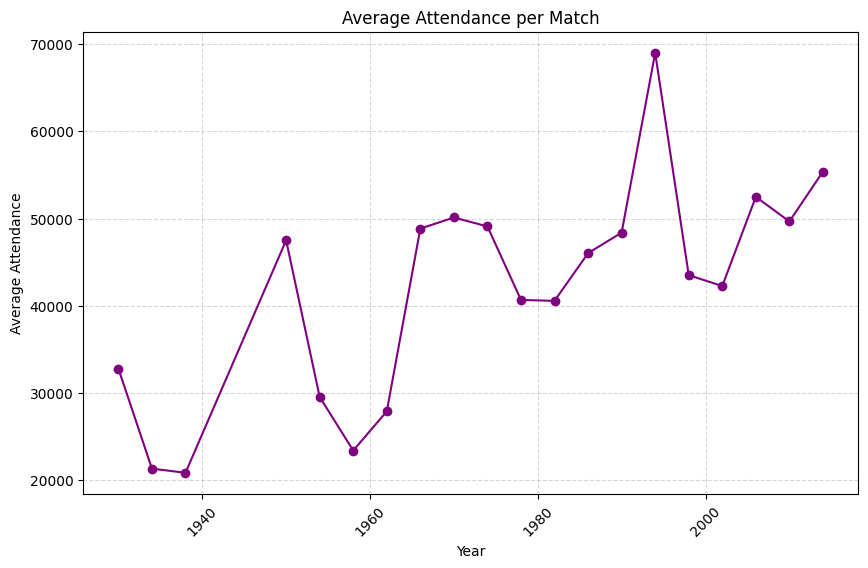

In [60]:
# Creating a line chart for average attendance per match
avg_attendance_per_match = world_cup_matches.groupby('Year')['Attendance'].mean()

plt.figure(figsize=(10, 6))
plt.plot(avg_attendance_per_match.index, avg_attendance_per_match.values, marker='o', color='purple', linestyle='-')
plt.title('Average Attendance per Match')
plt.xlabel('Year')
plt.ylabel('Average Attendance')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()
